In [20]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

The data set had the current time missing for the first ~10 rows. These have been replaced with 00:00:00.

In [21]:
data_path = os.path.join(os.getcwd(),'results.txt')
names=['execution_time', 'no_of_mappers', 'no_of_reducers', 'combiner_used', 'input_file_factor', 'current_time']
data_set_raw = pd.read_csv(data_path, delimiter = '|', names = names)
data_set_raw.head(5)

,execution_time,no_of_mappers,no_of_reducers,combiner_used,input_file_factor,current_time
0,Script Execution Time: 142.88 seconds,Mappers: 1,Reducers: 1,Combiner Used: No,Input File: 100x,NaN
1,Script Execution Time: 119.57 seconds,Mappers: 1,Reducers: 2,Combiner Used: No,Input File: 100x,NaN
2,Script Execution Time: 110.75 seconds,Mappers: 1,Reducers: 3,Combiner Used: No,Input File: 100x,NaN
3,Script Execution Time: 111.18 seconds,Mappers: 1,Reducers: 4,Combiner Used: No,Input File: 100x,NaN
4,Script Execution Time: 105.59 seconds,Mappers: 1,Reducers: 5,Combiner Used: No,Input File: 100x,NaN


Currently each entry has the column label. These need removed and added to the dataframe columns. Define method to clean the dataset.

In [22]:
def clean_data(data_set_raw):
    data_set = data_set_raw.copy() 
    data_set[names[0]] = pd.to_numeric(data_set[names[0]]
                                            .str.split(':')
                                            .str.get(1)
                                            .str.split(' ')
                                            .str.get(1))

    data_set[names[1]] = pd.to_numeric(data_set[names[1]]
                                            .str.split(':')
                                            .str.get(1))

    data_set[names[2]]= pd.to_numeric(data_set[names[2]]
                                            .str.split(':')
                                            .str.get(1))

    data_set[names[3]] = data_set[names[3]].str.split(':').str.get(1).str.strip()
    d = {'Yes': True, 'No': False}
    data_set[names[3]] = data_set['combiner_used'].map(d)

    data_set[names[4]]= pd.to_numeric(data_set[names[4]]
                                            .str.split(':')
                                            .str.get(1)
                                            .str.strip().str.rstrip('x'))

    data_set = data_set.drop(names[5], axis=1)
    return data_set

In [23]:
random_state = 42
data_set = clean_data(data_set_raw)
train_set, _ = train_test_split(data_set, test_size=0.2, random_state=random_state)
train_set = train_set.sort_values(by=[names[1], names[2]]) 
train_set.sample(7, random_state=10)

,execution_time,no_of_mappers,no_of_reducers,combiner_used,input_file_factor
415,97.68,1,16,True,100
25,68.59,2,6,False,100
518,45.61,6,19,True,100
645,32.38,13,6,True,100
300,63.67,16,1,False,100
88,50.36,5,9,False,100
504,40.31,6,5,True,100


Display info about columns.

In [24]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   execution_time     640 non-null    float64
 1   no_of_mappers      640 non-null    int64  
 2   no_of_reducers     640 non-null    int64  
 3   combiner_used      640 non-null    bool   
 4   input_file_factor  640 non-null    int64  
dtypes: bool(1), float64(1), int64(3)
memory usage: 25.6 KB


Next look at some summary statistics using describe.

In [25]:
train_set.describe(include='all')

,execution_time,no_of_mappers,no_of_reducers,combiner_used,input_file_factor
count,640.000000,640.000000,640.000000,640,640.0
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,True,NaN
freq,NaN,NaN,NaN,320,NaN
mean,47.705813,10.360938,10.467187,NaN,100.0
std,16.603388,5.743285,5.786406,NaN,0.0
min,31.130000,1.000000,1.000000,NaN,100.0
25%,38.420000,5.000000,5.000000,NaN,100.0
50%,41.525000,10.000000,10.500000,NaN,100.0
75%,49.465000,15.000000,15.000000,NaN,100.0


(array([ 39., 132., 165.,  95.,  53.,  31.,  23.,  13.,  20.,   8.,  15.,
          6.,   0.,   3.,   0.,   0.,   3.,  11.,   3.,   6.,  10.,   2.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 31.13 ,  34.855,  38.58 ,  42.305,  46.03 ,  49.755,  53.48 ,
         57.205,  60.93 ,  64.655,  68.38 ,  72.105,  75.83 ,  79.555,
         83.28 ,  87.005,  90.73 ,  94.455,  98.18 , 101.905, 105.63 ,
        109.355, 113.08 , 116.805, 120.53 , 124.255, 127.98 , 131.705,
        135.43 , 139.155, 142.88 ]),
 <a list of 30 Patch objects>)

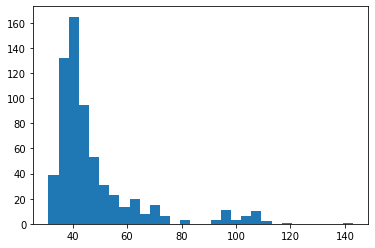

In [26]:
# Histogram of distribution of execution times
plt.hist(train_set[names[0]], bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f610fc022e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f610fc02940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f610fbf4f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f610fc02fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f610fbf4eb0>],
 'means': []}

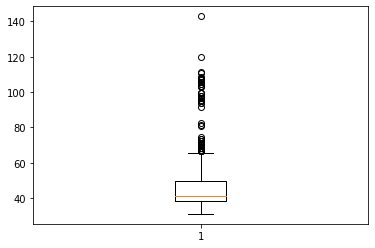

In [27]:
plt.boxplot(train_set[names[0]])

In [28]:
#plt.scatter(np.log(train_set[names[0]]), bins=30)

In [29]:
from scipy.stats import skew, kurtosis
print('Skewness:\n{}'.format(skew(train_set[names[0]]))) 
print('Kurtosis:\n{}'.format(kurtosis(train_set[names[0]]))) 

Skewness:
2.416806168288582
Kurtosis:
6.0460600914349705


{'whiskers': [<matplotlib.lines.Line2D at 0x7f610fbd80a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f610fbd8700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f610fbcbcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f610fbd8d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f610fbcbc70>],
 'means': []}

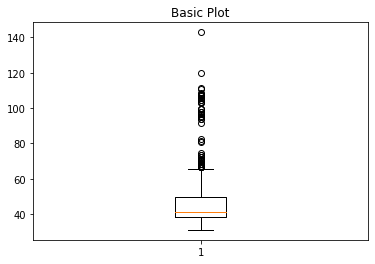

In [30]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(train_set[names[0]])

- There are two distributions here one centered around 100.
- The second one is the main one but it sill has a heavy tail.

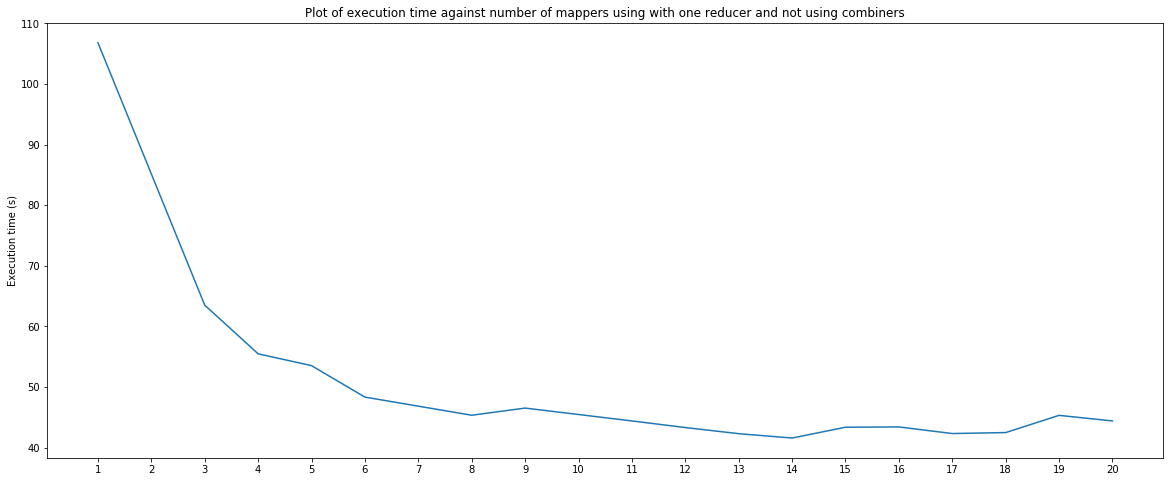

In [31]:
# Plots execution time vs number of mappers for fixed reducers and combiner
def plot_time_vs_mappers(fixed_number_of_reducers, use_combiners, ax):
    cond = (train_set[names[2]] == fixed_number_of_reducers) & (train_set[names[3]] == use_combiners)
    filt = train_set[cond]
    ax.plot(filt[names[1]], filt[names[0]], label=str(fixed_number_of_reducers))
    ax.set_xticks(np.arange(1,21,1))
   

    
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylabel('Execution time (s)')
ax.set_title('Plot of execution time against number of mappers using with one reducer and not using combiners')
plot_time_vs_mappers(20, False, ax)

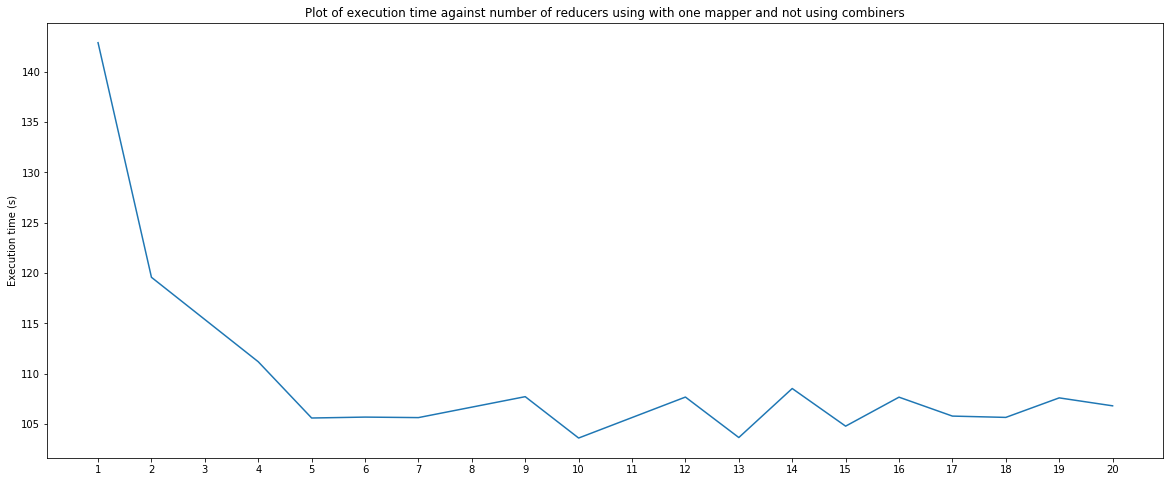

In [32]:
# Plots execution time vs number of reducers for fixed mappers and combiner
def plot_time_vs_reducers(fixed_number_of_mappers, use_combiners, ax):
    cond = (train_set[names[1]] == fixed_number_of_mappers) & (train_set[names[3]] == use_combiners)
    filt = train_set[cond]
    ax.plot(filt[names[2]], filt[names[0]], label=str(fixed_number_of_mappers))
    ax.set_xticks(np.arange(1,21,1))

    
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylabel('Execution time (s)')
ax.set_title('Plot of execution time against number of reducers using with one mapper and not using combiners')
plot_time_vs_reducers(1, False, ax)

The experiments that where run have three main variables: number of mappers, number of reducers and if a combiner was used. To invesitgate how the number of mappers affects execution time the other two variables (number of reducers and if a combiner was used) have to be held constant. Similairly two invesitgate how executiontime varies with the number of reducers the reamianing variables have to be held constant. <br>

The following graph do the following:
- Plot the execution time against the number of mappers, with constant number of reducers and no combiner.
- Repeat this plot for each number of reducers for a total of 20 plots on the same figure.

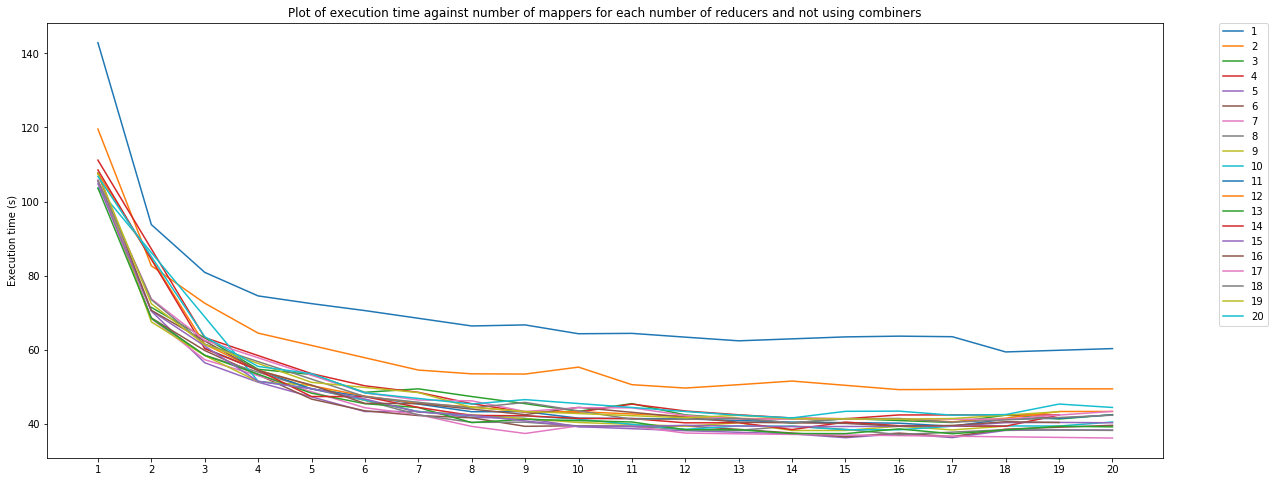

In [33]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylabel('Execution time (s)')
ax.set_title('Plot of execution time against number of mappers for each number of reducers and not using combiners')
for i in np.arange(1,21,1):
    plot_time_vs_mappers(i, False, ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This cell is the oppoisite of the previuous graph:
- Plot the execution time against the number of reducers, with constant number of mappers and no combiner.
- Repeat this plot for each number of mappers for a total of 20 plots on the same figure.

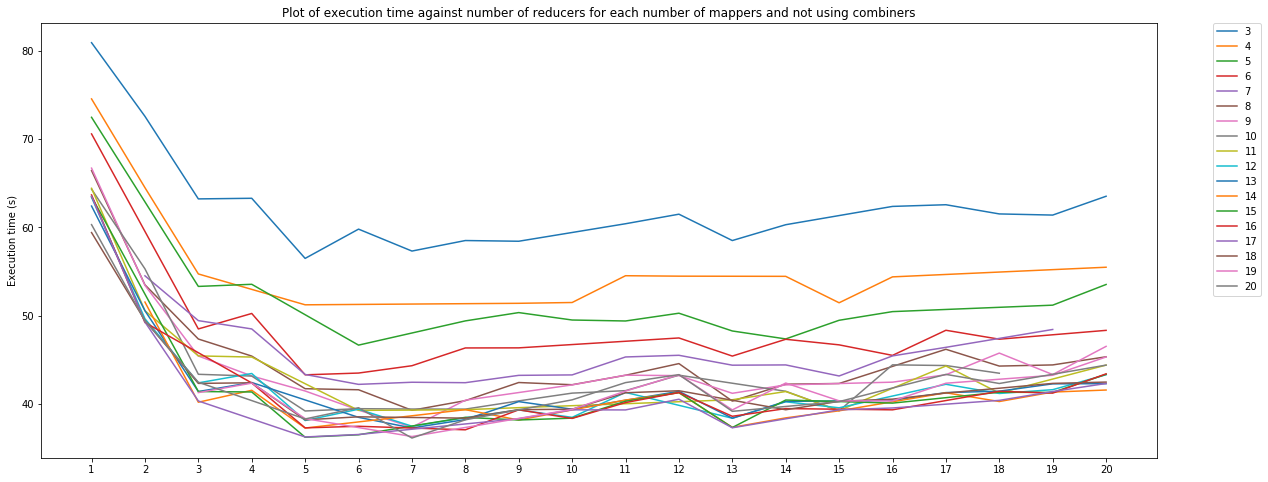

In [34]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylabel('Execution time (s)')
ax.set_title('Plot of execution time against number of reducers for each number of mappers and not using combiners')
for i in np.arange(3,21,1):
    plot_time_vs_reducers(i, False, ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

- Looking at the histogram it appears to be made up several distributions, as the aim is to minimise execution time lets remove all values above the 75th percentile and look at the data.

In [74]:
less_than_50 = train_set[train_set[names[0]] < 50]
greater_than_50 = train_set[train_set[names[0]] >= 50]
less_than_50.describe(include='all')

,execution_time,no_of_mappers,no_of_reducers,combiner_used,input_file_factor,good_config
count,484.000000,484.000000,484.000000,484,484.0,484
unique,NaN,NaN,NaN,2,NaN,2
top,NaN,NaN,NaN,True,NaN,False
freq,NaN,NaN,NaN,253,NaN,309
mean,40.421901,12.376033,10.981405,NaN,100.0,NaN
std,4.056767,4.690760,5.376668,NaN,0.0,NaN
min,31.130000,3.000000,1.000000,NaN,100.0,NaN
25%,37.490000,8.000000,6.000000,NaN,100.0,NaN
50%,40.290000,12.000000,11.000000,NaN,100.0,NaN
75%,42.500000,16.000000,15.000000,NaN,100.0,NaN


In [37]:
greater_than_50.describe(include='all')

,execution_time,no_of_mappers,no_of_reducers,combiner_used,input_file_factor
count,156.000000,156.000000,156.000000,156,156.0
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,False,NaN
freq,NaN,NaN,NaN,89,NaN
mean,70.304615,4.108974,8.871795,NaN,100.0
std,20.137734,3.924405,6.675635,NaN,0.0
min,50.260000,1.000000,1.000000,NaN,100.0
25%,54.397500,2.000000,2.000000,NaN,100.0
50%,63.485000,3.000000,8.000000,NaN,100.0
75%,81.037500,4.000000,15.000000,NaN,100.0


(array([12., 27., 51., 80., 89., 73., 68., 31., 22., 31.]),
 array([31.13 , 32.983, 34.836, 36.689, 38.542, 40.395, 42.248, 44.101,
        45.954, 47.807, 49.66 ]),
 <a list of 10 Patch objects>)

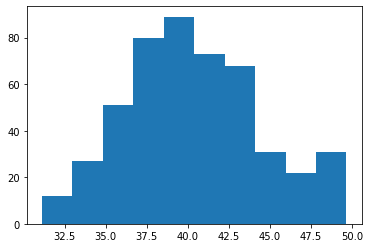

In [38]:
plt.hist(less_than_50[names[0]])

In [76]:
from scipy.stats import skew, kurtosis
print('Skewness:\n{}'.format(skew(less_than_50[names[0]]))) 
print('Kurtosis:\n{}'.format(kurtosis(less_than_50[names[0]]))) 

Skewness:
0.27496041460505144
Kurtosis:
-0.2203664029768473


- The result is a much more even distribution of times shown both in the histogram and by the the skewness and curtosis.
- This can be seen as a population of good configs.

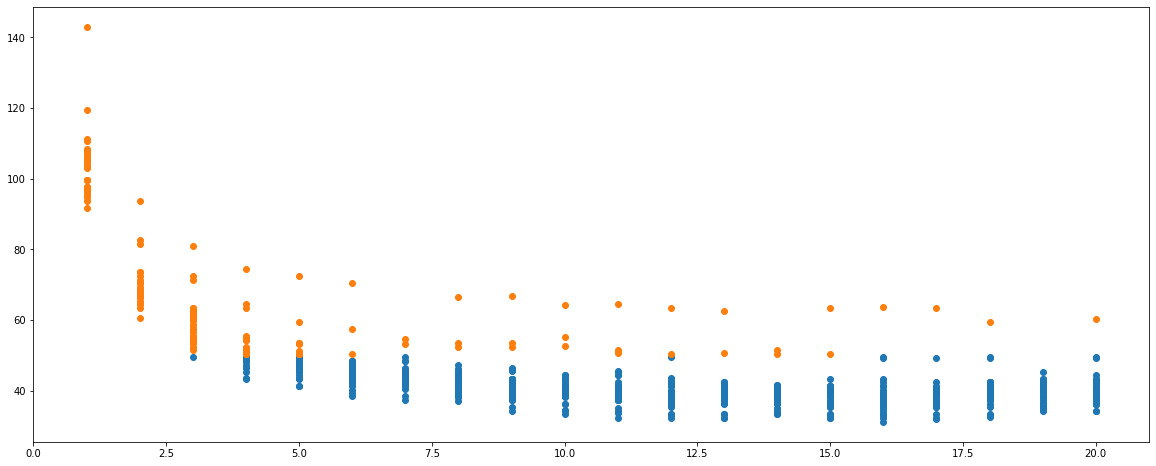

In [39]:

fig, ax = plt.subplots(figsize=(20,8))

ax.scatter(less_than_50[names[1]], less_than_50[names[0]])
ax.scatter(greater_than_50[names[1]], greater_than_50[names[0]])


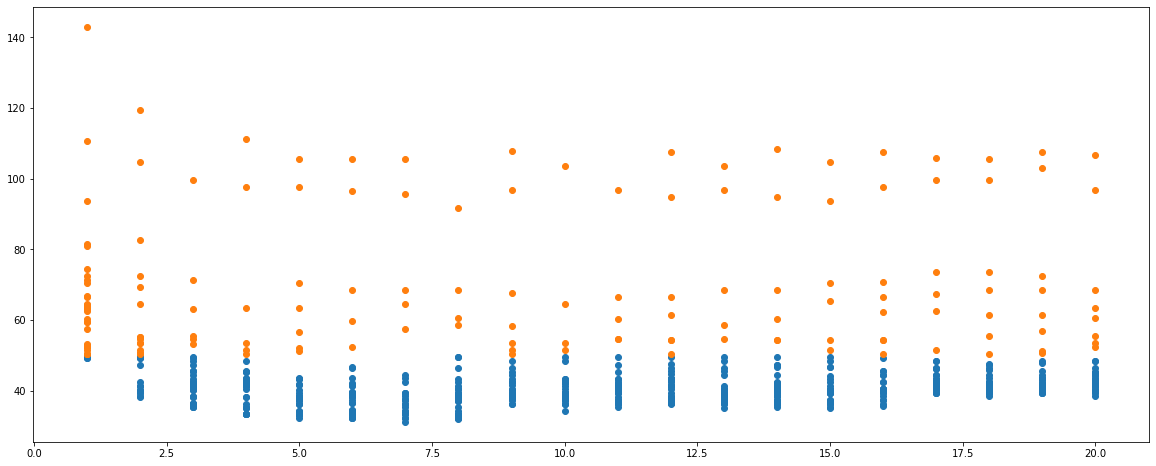

In [40]:

fig, ax = plt.subplots(figsize=(20,8))

ax.scatter(less_than_50[names[2]], less_than_50[names[0]])
ax.scatter(greater_than_50[names[2]], greater_than_50[names[0]])

- In the previous two plots it can be seen that there is a section on the right of the graph where the execution time no longer decreases and soemtimes increases, aka the time complexity. However, having additional mappers and reducers comes with an overhead and increases space complexity. To identify good run configurations lets try and create boundaries that removed those that use excessive numbers of amppers and reducers. To do this we will use countour plots.

In [77]:

time = train_set[names[0]].values
no_map = train_set[names[1]].values
no_red = train_set[names[2]].values
comb = train_set[names[3]].values

data = []

for i in range(time.shape[0]):
    data.append([time[i], no_map[i], no_red[i], comb[i]])


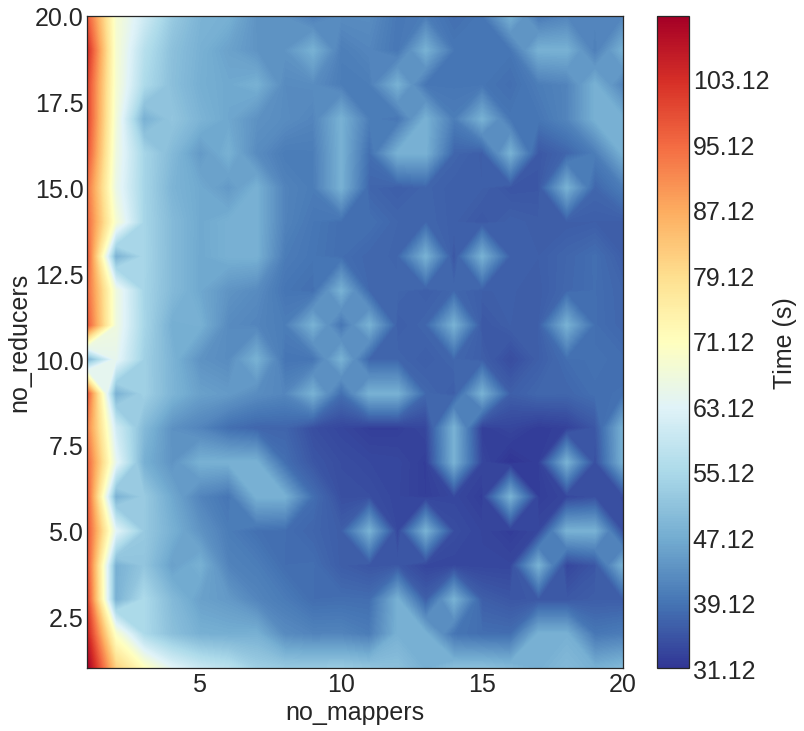

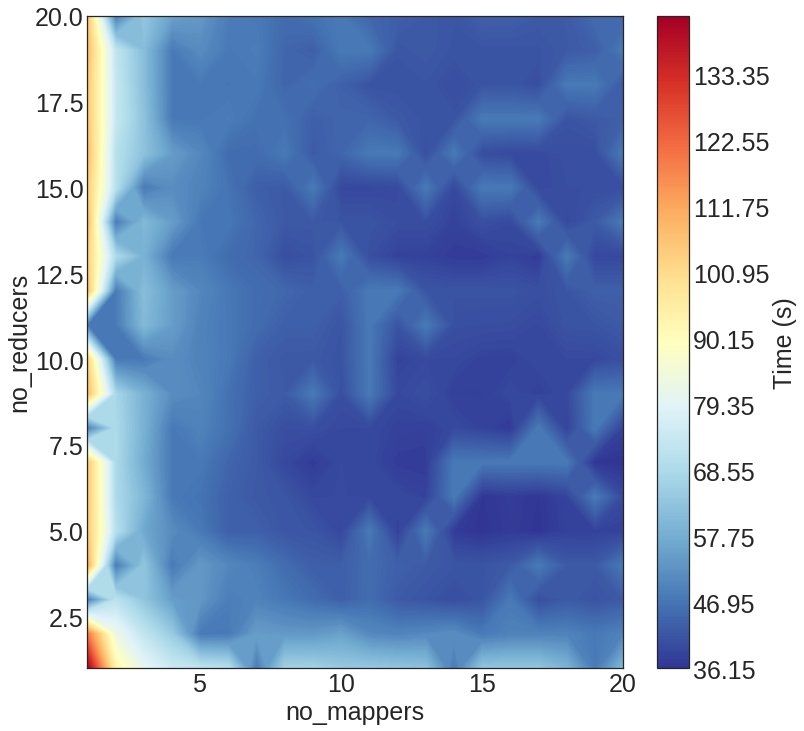

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

plt.style.use('seaborn-white')
import matplotlib

font = {'size' :25}
matplotlib.rc('font', **font)


def plot_contour(data):

    n_map = []
    n_red = []
    time = []
    comb = []

    for i, line in enumerate(data):
        n_map.append(line[1])
        n_red.append(line[2])
        time.append(line[0])
        comb.append(line[3])

    n_map = np.array(n_map)
    n_red = np.array(n_red)
    time = np.array(time)
    comb = np.array(comb)
    
    n_map_vals = np.arange(1,21)
    n_red_vals = np.arange(1,21)
    n_comb = [True, False]

    X, Y = np.meshgrid(n_map_vals, n_red_vals)
    
    time_min = np.mean(time)
    Z_True = np.ones(X.shape)*time_min
    Z_False = np.ones(X.shape)*time_min

    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            for k in range(time.shape[0]):
                if X[i, j] == n_map[k] and Y[i, j] == n_red[k] and comb[k] == n_comb[0]:
                    Z_True[i, j] = time[k]
                    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            for k in range(time.shape[0]):
                if X[i, j] == n_map[k] and Y[i, j] == n_red[k] and comb[k] == n_comb[1]:
                    Z_False[i, j] = time[k]

                    

    

    
    
    figure = plt.figure(figsize=(12,12))
    plt.contourf(X, Y, Z_True, 1000, cmap='RdYlBu_r')
    plt.colorbar(label='Time (s)')
    plt.xlabel('no_mappers')
#     plt.yscale('log')
    plt.ylabel('no_reducers')
    plt.show()
    
    
    figure = plt.figure(figsize=(12,12))
    plt.contourf(X, Y, Z_False, 1000, cmap='RdYlBu_r')
    plt.colorbar(label='Time (s)')
    plt.xlabel('no_mappers')
#     plt.yscale('log')
    plt.ylabel('no_reducers')
    plt.show()
    
#     figure = plt.figure(figsize=(12,12))
#     plt.contourf(X, Y, Z_25, 1000, cmap='RdYlBu_r')
#     plt.colorbar(label='MSE Validation')
#     plt.xlabel('n')
# #     plt.yscale('log')
#     plt.ylabel('$\lambda$')
#     plt.show()
    

    

plot_contour(data)
#plot_contour('results_gridsearch2.csv' ,7)
#plot_contour('results_gridsearch_all.csv' ,15)

- The first countour plot is with combiners the second without.
- The light artifacts that can be seen are when specific values are missing as they have been removed to be part of the test set.
- Based on the two plots the following boundaries where decided upon: either a max of 5 reducers and 10 mappers or 8 reducers and 16 mappers.
- However, this also removes the very best runs that use a high number of mappers or reducers which seem like sensible configurations.
- Solution is to add an or clause to allow anythunder the 25th percentile of the full data set which is 38 sec.

In [108]:
cond = ((train_set[names[0]] < 50)  \
    & (((train_set[names[1]] <= 10) &  (train_set[names[2]] <= 5)) \
       | ((train_set[names[1]] <= 16) &  (train_set[names[2]] <= 8)))) | (train_set[names[0]] < 38)



good_configs = train_set[cond]
bad_configs = train_set[~cond]
good_configs.describe(include='all')

,execution_time,no_of_mappers,no_of_reducers,combiner_used,input_file_factor,good_config
count,215.000000,215.000000,215.000000,215,215.0,215
unique,NaN,NaN,NaN,2,NaN,2
top,NaN,NaN,NaN,True,NaN,True
freq,NaN,NaN,NaN,146,NaN,136
mean,38.295535,12.465116,7.246512,NaN,100.0,NaN
std,4.152083,4.243460,3.788778,NaN,0.0,NaN
min,31.130000,3.000000,1.000000,NaN,100.0,NaN
25%,36.145000,9.000000,4.000000,NaN,100.0,NaN
50%,37.350000,13.000000,6.000000,NaN,100.0,NaN
75%,40.385000,16.000000,9.000000,NaN,100.0,NaN


(array([12., 27., 51., 52., 19., 16., 16.,  8.,  5.,  9.]),
 array([31.13 , 32.983, 34.836, 36.689, 38.542, 40.395, 42.248, 44.101,
        45.954, 47.807, 49.66 ]),
 <a list of 10 Patch objects>)

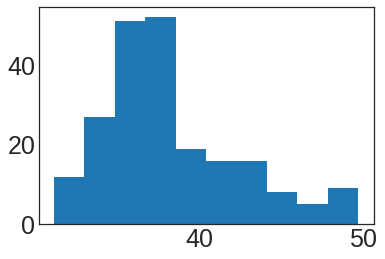

In [109]:
plt.hist(good_configs[names[0]], bins=10)

In [110]:
from scipy.stats import skew, kurtosis
print('Skewness:\n{}'.format(skew(less_than_50[names[0]]))) 
print('Kurtosis:\n{}'.format(kurtosis(less_than_50[names[0]]))) 

Skewness:
0.27496041460505144
Kurtosis:
-0.2203664029768473


In [111]:
bad_configs.describe(include='all')

,execution_time,no_of_mappers,no_of_reducers,combiner_used,input_file_factor,good_config
count,425.000000,425.000000,425.000000,425,425.0,425
unique,NaN,NaN,NaN,2,NaN,1
top,NaN,NaN,NaN,False,NaN,False
freq,NaN,NaN,NaN,251,NaN,425
mean,52.466306,9.296471,12.096471,NaN,100.0,NaN
std,18.415729,6.102629,5.940953,NaN,0.0,NaN
min,38.210000,1.000000,1.000000,NaN,100.0,NaN
25%,40.490000,4.000000,9.000000,NaN,100.0,NaN
50%,44.410000,8.000000,13.000000,NaN,100.0,NaN
75%,55.360000,15.000000,17.000000,NaN,100.0,NaN


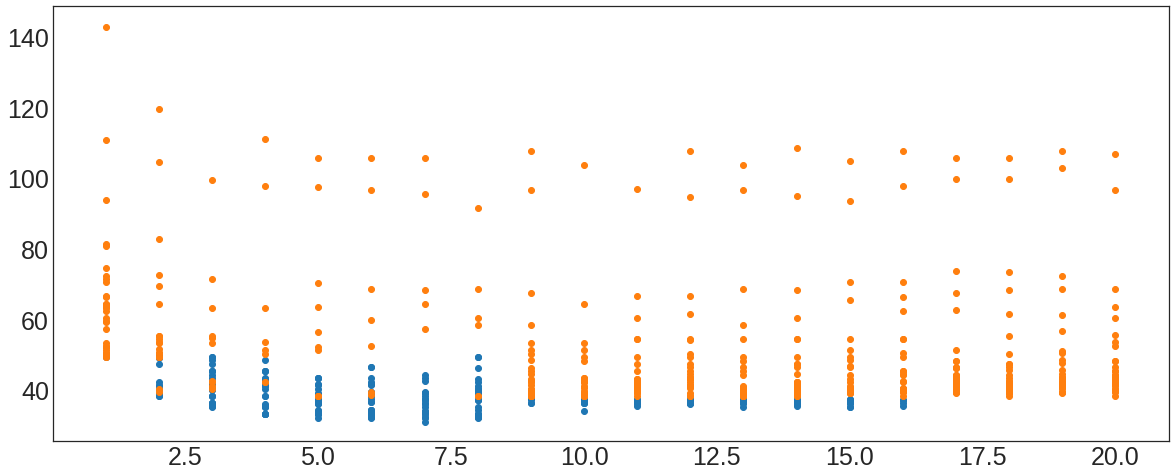

In [112]:
fig, ax = plt.subplots(figsize=(20,8))

ax.scatter(good_configs[names[2]], good_configs[names[0]])
ax.scatter(bad_configs[names[2]], bad_configs[names[0]])

- Finally add a label to the dataset indicating wether a configuration is good or bad. 

In [117]:
train_set['good_config'] = cond
train_set.sample(7, random_state=10)

,execution_time,no_of_mappers,no_of_reducers,combiner_used,input_file_factor,good_config
415,97.68,1,16,True,100,False
25,68.59,2,6,False,100,False
518,45.61,6,19,True,100,False
645,32.38,13,6,True,100,True
300,63.67,16,1,False,100,False
88,50.36,5,9,False,100,False
504,40.31,6,5,True,100,True
